In [1]:
#!pip install apt-get
#!pip install sqlite3
#!pip install sqlalchemy
#!pip install psycopg2

# Business Problem

A **Insurance All** é uma empresa que fornece seguro de saúde para seus clientes e o time de produtos está analisando a possibilidade de oferecer aos assegurados, um novo produto: Um seguro de automóveis.

Assim como o seguro de saúde, os clientes desse novo plano de seguro de automóveis precisam pagar um valor anualmente à Insurance All para obter um valor assegurado pela empresa, destinado aos custos de um eventual acidente ou dano ao veículo.

A Insurance All fez uma pesquisa com cerca de 380 mil clientes sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes.

O time de produtos selecionou 127 mil novos clientes que não responderam a pesquisa para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas.

Contudo, o time de vendas tem uma capacidade de realizar 20 mil ligações dentro do período da campanha.

Nesse contexto, você foi contratado como um consultor de Ciência de Dados para construir um modelo que prediz se o cliente estaria ou não interessado no seguro de automóvel. 

Com a sua solução, o time de vendas espera conseguir priorizar as pessoas com maior interesse no novo produto e assim, otimizar a campanha realizando apenas contatos aos clientes mais propensos a realizar a compra.

Como resultado da sua consultoria, você precisará entregar um relatório contendo algumas análises e respostas às seguintes perguntas:

1) Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.

2) Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?

3) E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?

4) Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

**Business Problem**

    1) Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.


**Final Product**
1. Principais insights dos atributos dos clientes

2. Formato da entrega
    Gráficos/Tabela
    
3. Local da entrega
    Telegram/PowerBI


**Process**
1. Passo a passo
    - Realizar feature engineering na base de dados (1º bd - 380K) dos clientes interessados e levantar as hipóteses para cada atributo a ser validada; 
    - No EDA validar as hipóteses e identificar insights dos clientes interessados;


2. Definir o formato da entrega (visualizaçao, tabela, frase)
    - Gráficos que melhor demonstrem as informaçoes.
    - Utilizar os seguintes parâmetros: Id | Gender | Age | Driving License | Region Code | Previously Insured | Vehicle Age | Vehicle Damage | Anual Premium | Policy sales channel | Vintage |
    - Definiçao do schema: colunas e seu tipo
    - Definição da infraestrutura de armazenamento (SQLITE3)
    - Design do ETL (Scripts de Extração, Transformação e Carga)
    - Planejamento de agendamento dos scripts (dependência entre os scripts)
    - Fazer as visualizações
    - Entrega do produto final


3. Decidir o local de entrega (powerBi, telegram, email, streamlit, intranet)
    - PowerBI, Telegram
    
    
**Enter**
1. Fonte de dados:
    - Site da Kaggle
    - BD na AWS

2. Ferramentas:
    - Pyhton 3.8.0
    - AWS
    - Pycharm
    - Jupyter Notebook (análises e prototipagens)
    - Crontjob, Airflow
    - Streamlit
    - PowerBI
    - Telegram

**Business Problem**

    2) Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?
    3) E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?
    4) Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?


**Final Product**
1. Percentual de clientes interessados da base e se poderá atender o limite de 20K/40K ligaçoes

2. Formato da entrega
    Gráfico ou tabela
    
3. Local da entrega
    Telegram


**Process**
1. Passo a passo
    - Realizar análise da base de dados (2 bd 127 K) e aplicar modelos de ML para obter os atributos que definem
        o cliente com maior probabilidade de adquirir o seguro. Com essas características definir a quantidade 
        de clientes potenciais e se e possível atender com 20/40K ligaçoes.

2. Definir o formato da entrega (visualizaçao, tabela, frase)
    - Gráfico ou tabela

3. Decidir o local de entrega (powerBi, telegram, email, streamlit, intranet)
    - PowerBI, Telegram
    
    
**Enter**
1. Fonte de dados:
    - Site da Kaggle
    - BD na AWS

2. Ferramentas:
    - Pyhton 3.8.0
    - AWS
    - Pycharm
    - Jupyter Notebook (análises e prototipagens)
    - Crontjob, Airflow
    - Streamlit
    - PowerBI
    - Telegram

# Imports and credentials

In [193]:
import csv

import numpy                 as np
import pandas                as pd
import seaborn               as sns
import psycopg2              as pg 
import pandas.io.sql         as psql
import matplotlib.pyplot     as plt
import statistics            as st
import scikitplot            as skplt

from numpy                   import cov
from numpy                   import percentile
from scipy.stats             import pearsonr
from prettytable             import PrettyTable
from IPython.display         import Image
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import MinMaxScaler

from sklearn                 import model_selection as ms
from sklearn                 import preprocessing   as pp
from sklearn                 import ensemble        as en
from matplotlib              import pyplot          as plt
from sklearn                 import neighbors       as nh
from sklearn                 import linear_model    as lm

In [3]:
#calculate % people who had CVD
def perc (x):
    j = len(x)
    for i in range(len(x)):
        if i < j:
            p = ((x['total'][i])/(x['total'][i+pow(-1,(i+2))]+x['total'][i]))*100
            x['%_insur_1'][i] = p
        else:
            exit
    return x

In [4]:
#credentials


In [5]:
#connect
conn = pg.connect(host=host,
                 port=port,
                 database=database,
                 user=user,
                 password=password)

# 1.0 Schema Query

In [6]:
cursor = conn.cursor()

query_schema = """
    SELECT nspname
    FROM pg_catalog.pg_namespace

"""

cursor.execute(query_schema)

In [7]:
records = cursor.fetchall()
print(records)
#cursor.close()
#conn.close()

[('pg_toast',), ('pg_temp_1',), ('pg_toast_temp_1',), ('pg_catalog',), ('information_schema',), ('public',), ('pa004',), ('pg_temp_4',), ('pg_toast_temp_4',), ('pa005',), ('pg_temp_9',), ('pg_toast_temp_9',)]


# 2.0 Table Query

In [8]:
cursor = conn.cursor()

query_tables = """
    SELECT tablename
    FROM pg_tables
    WHERE schemaname = 'pa004'

"""

cursor.execute(query_tables)

In [9]:
records = cursor.fetchall()
print(records)
#cursor.close()
#conn.close()

[('users',), ('vehicle',), ('insurance',)]


# 3.0 Collect Data using Psycopg2

In [10]:
cursor = conn.cursor()

query_tables_users = """
    SELECT *
    FROM pa004.users u
    WHERE u.age >40
    limit 10

"""

cursor.execute(query_tables_users)

In [11]:
records = cursor.fetchall()
print(records)
#cursor.close()
#conn.close()

[(1, 'Male', 44, 28.0, 26.0), (2, 'Male', 76, 3.0, 26.0), (3, 'Male', 47, 28.0, 26.0), (8, 'Female', 56, 28.0, 26.0), (11, 'Female', 47, 35.0, 124.0), (13, 'Female', 41, 15.0, 14.0), (14, 'Male', 76, 28.0, 13.0), (15, 'Male', 71, 28.0, 30.0), (19, 'Male', 42, 28.0, 124.0), (20, 'Female', 60, 33.0, 124.0)]


In [12]:
data = pd.DataFrame(records)
data.head()

,0,1,2,3,4
0,1,Male,44,28.0,26.0
1,2,Male,76,3.0,26.0
2,3,Male,47,28.0,26.0
3,8,Female,56,28.0,26.0
4,11,Female,47,35.0,124.0


# 4.0 Collect using Pandas

In [13]:
query_tables_users = """
    SELECT *
    FROM pa004.users u
"""

df_users = psql.read_sql(query_tables_users,conn)
df_users.head()

,id,gender,age,region_code,policy_sales_channel
0,1,Male,44,28.0,26.0
1,2,Male,76,3.0,26.0
2,3,Male,47,28.0,26.0
3,4,Male,21,11.0,152.0
4,5,Female,29,41.0,152.0


In [14]:
query_tables_vehicle = """
    SELECT *
    FROM pa004.vehicle v
"""

df_vehicle = psql.read_sql(query_tables_vehicle,conn)
df_vehicle.head()

,id,driving_license,vehicle_age,vehicle_damage
0,1,1,> 2 Years,Yes
1,2,1,1-2 Year,No
2,3,1,> 2 Years,Yes
3,4,1,< 1 Year,No
4,5,1,< 1 Year,No


In [15]:
query_tables_insurance = """
    SELECT *
    FROM pa004.insurance i
"""

df_insurance = psql.read_sql(query_tables_insurance,conn)
df_insurance.head()

,id,previously_insured,annual_premium,vintage,response
0,1,0,40454.0,217,1
1,2,0,33536.0,183,0
2,3,0,38294.0,27,1
3,4,1,28619.0,203,0
4,5,1,27496.0,39,0


In [16]:
query_tables_all = """
    SELECT *
    FROM pa004.insurance i inner join pa004.vehicle v on (i.id = v.id)
                           inner join pa004.users u on (i.id = u.id)
"""

df = psql.read_sql(query_tables_all,conn)


In [17]:
df.to_csv('data.csv')

In [153]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0', 'id.1', 'id.2'], axis=1)

# 1.0. Data Description

In [154]:
df1 = df.copy()

## 1.1. Data Dimensions

In [20]:
print('Number of columns: ', df1.shape[1])
print('Number of rows: ', df1.shape[0])

Number of columns:  12
Number of rows:  381109


## 1.2. Data Types

In [21]:
df1.dtypes

id                        int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
dtype: object

## 1.3. Checking NA

In [22]:
df1.isna().sum()

id                      0
previously_insured      0
annual_premium          0
vintage                 0
response                0
driving_license         0
vehicle_age             0
vehicle_damage          0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
dtype: int64

## 1.4. Unity Change

In [155]:
#annual_premium
df1['annual_premium'] = df1['annual_premium'].astype(int)

In [156]:
#region_code
df1['region_code'] = df1['region_code'].astype(int)

In [157]:
#policy_sales_channel
df1['policy_sales_channel'] = df1['policy_sales_channel'].astype(int)

In [158]:
#gender
df1['gender'] = df1['gender'].apply(lambda x: 1 if x == 'Female' else 2)

## 1.5. Descriptive Statiscal

In [89]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(include = ['int64', 'float64', 'datetime64[ns]'])

In [90]:
#central tendency - mean, median, mode
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
ct3 = pd.DataFrame(num_attributes.apply(st.mode)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(min)).T
d2 = pd.DataFrame(num_attributes.apply(max)).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(num_attributes.apply(np.std)).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d1,d2,d3,ct1,ct2,ct3,d4,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','mode','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,mode,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,7.0,110016.691870,-8.071174e-18,-1.200000
1,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.0,0.498251,1.677471e-01,-1.971871
2,vintage,10.0,299.0,289.0,154.347397,154.0,256.0,83.671194,3.029517e-03,-1.200688
3,response,0.0,1.0,1.0,0.122563,0.0,0.0,0.327935,2.301906e+00,3.298788
4,driving_license,0.0,1.0,1.0,0.997869,1.0,1.0,0.046109,-2.159518e+01,464.354302
5,vehicle_age,1.0,2.0,1.0,1.304808,1.5,1.5,0.283719,2.528959e-01,-0.792253
6,vehicle_damage,0.0,1.0,1.0,0.504877,1.0,1.0,0.499976,-1.950724e-02,-1.999630
7,gender,1.0,2.0,1.0,1.540761,2.0,2.0,0.498336,-1.635904e-01,-1.973249
8,age,20.0,85.0,65.0,38.822584,36.0,24.0,15.511591,6.725390e-01,-0.565655


# 2.0. Feature Engineering

In [159]:
df2 = df1.copy()

In [160]:
#vehicle_damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [161]:
#vehicle_age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'under 1 yr' if x == '< 1 Year' else x)
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'between 1 - 2yr' if x == '1-2 Year' else x)
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over 2 yr' if x == '> 2 Years' else x)

#transform to (int)
#df1['vehicle_age'] = pd.to_numeric(df1['vehicle_age'],errors = 'coerce')

In [162]:
df2

,id,previously_insured,annual_premium,vintage,response,driving_license,vehicle_age,vehicle_damage,gender,age,region_code,policy_sales_channel
0,7,0,23367,249,0,1,under 1 yr,1,2,23,11,152
1,13,1,31409,221,0,1,between 1 - 2yr,0,1,41,15,14
2,18,1,46622,299,0,1,under 1 yr,0,1,25,35,152
3,31,0,2630,136,0,1,under 1 yr,0,1,26,8,160
4,39,0,42297,264,0,1,between 1 - 2yr,1,2,45,8,124
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381070,1,38254,127,0,1,under 1 yr,0,2,24,8,152
381105,381079,0,39740,170,0,1,between 1 - 2yr,1,1,58,28,26
381106,381082,1,51619,80,0,1,between 1 - 2yr,0,1,75,28,26
381107,381097,0,34541,44,0,1,between 1 - 2yr,1,1,49,10,26


## 2.1 Mind Map

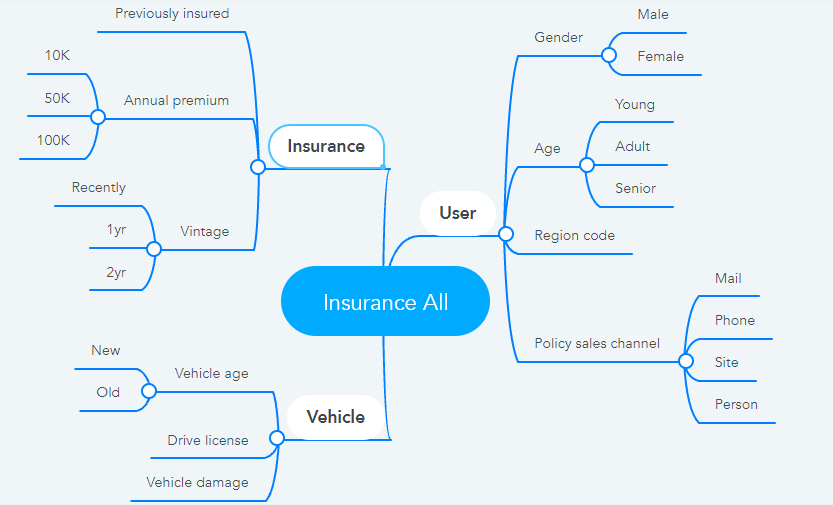

In [33]:
Image('C:/Users/Henrique/repos/Insurance All/mindmap.png')

In [34]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Category','Name', 'Code', 'Unity']) 

myTable.align["Name"] = "l"

# Add rows 
myTable.add_row(['User', 'Age', 'age', 'int (days)']) 
myTable.add_row(['User', 'Gender', 'gender', 'int - 1 (women) 2 (men)']) 
myTable.add_row(['User', 'Region code', 'region_code', 'int'])
myTable.add_row(['User', 'Policy sales channel', 'policy_sales_channel', 'int'])
myTable.add_row(['', '', '', ''])
myTable.add_row(['Vehicle','Vehicle age','vehicle_age', 'float'])
myTable.add_row(['Vehicle','Drive license','driving_license', 'int - 0 (no) 1 (yes)'])
myTable.add_row(['Vehicle','Vehicle damage','vehicle_damage', 'int - 0 (no) 1 (yes)'])
myTable.add_row(['', '', '', ''])
myTable.add_row(['Insurance','Previously insured','previously_insured', 'int - 0 (no) 1 (yes)'])
myTable.add_row(['Insurance','Annual premium','annual_premium', 'int'])
myTable.add_row(['Insurance','Vintage','vintage', 'int'])

print(myTable)

+-----------+----------------------+----------------------+-------------------------+
|  Category | Name                 |         Code         |          Unity          |
+-----------+----------------------+----------------------+-------------------------+
|    User   | Age                  |         age          |        int (days)       |
|    User   | Gender               |        gender        | int - 1 (women) 2 (men) |
|    User   | Region code          |     region_code      |           int           |
|    User   | Policy sales channel | policy_sales_channel |           int           |
|           |                      |                      |                         |
|  Vehicle  | Vehicle age          |     vehicle_age      |          float          |
|  Vehicle  | Drive license        |   driving_license    |   int - 0 (no) 1 (yes)  |
|  Vehicle  | Vehicle damage       |    vehicle_damage    |   int - 0 (no) 1 (yes)  |
|           |                      |                  

## 2.2 Hypothesis Creation

### 2.2.1 User Hypothesis

**1.** People between 30 years old are more susceptible to have an insurance

**2.** Women hire more insurances

### 2.2.2 Vehicle Hypothesis

**3.** Owners with new cars (< 1 yr) hire more insurances

**4.** People with drive license hire more insurances

**5.** Owners with vehicle damaged dont hire insurances

### 2.2.3 Insurance Hypothesis

**6.** People previously insured hire another insurance

**7.** Higher than 50K annual premium there are more insurances

**8.** More days with company more insurances get

# 3.0 Data Selecting

In [163]:
df3 = df2.copy()

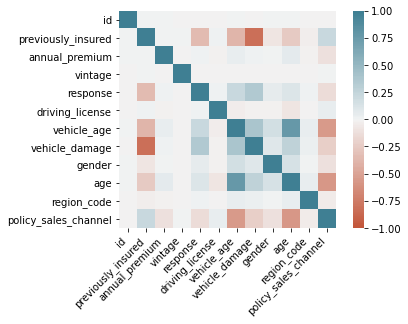

In [36]:
corr = df3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [37]:
covariance = cov(df3['vehicle_damage'], df3['previously_insured'])
print(covariance)

[[ 0.24997688 -0.20530554]
 [-0.20530554  0.24825426]]


In [38]:
covariance = cov(df3['age'], df3['vehicle_age'])
print(covariance)

[[2.40610076e+02 3.37020367e+00]
 [3.37020367e+00 8.04968687e-02]]


In [39]:
corr, _ = pearsonr(df3['vehicle_damage'], df3['previously_insured'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.824


In [40]:
corr, _ = pearsonr(df3['age'], df3['vehicle_age'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.766


## 3.1. Identifying Outliers

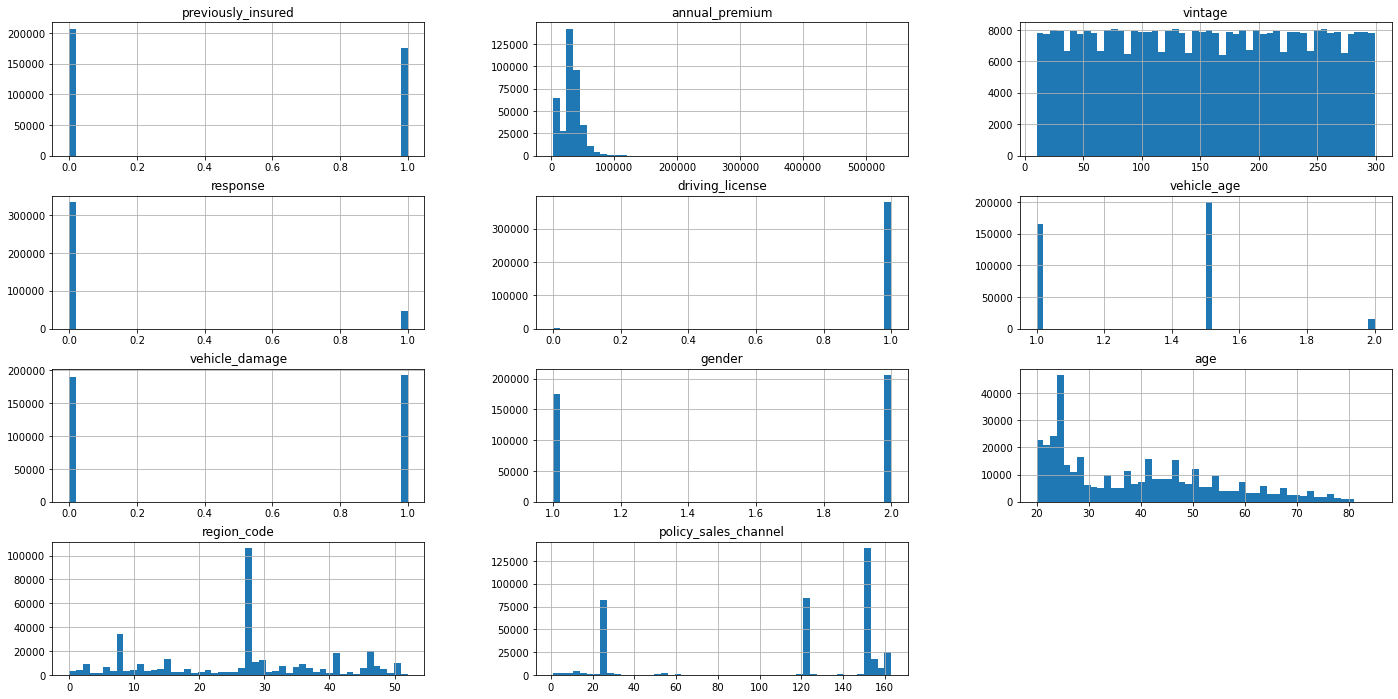

In [41]:
df32 = df3.drop('id', axis=1)
df32.hist(figsize=(24,12), bins=50);

C:\Users\Henrique\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


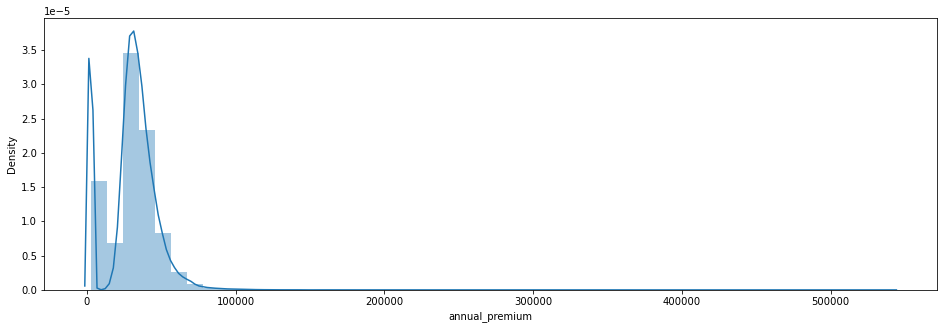

In [42]:
# histogram
plt.figure(figsize=(16,5))
plt.subplot(1,1,1)
sns.distplot(df3['annual_premium'])
#plt.subplot(1,2,2)
#sns.distplot(df['placement_exam_marks'])
plt.show()

In [43]:
df3['annual_premium'].unique().size

48838

### 3.1.1 IQR - Annual Premium

In [44]:
# calculate interquartile range
q25, q75 = percentile(df3['annual_premium'], 25), percentile(df3['annual_premium'], 75)
iqr = q75 - q25
print('Percentiles: 25th = ', q25 , '75th = ', q75, 'IQR= ', iqr)

Percentiles: 25th =  24405.0 75th =  39400.0 IQR=  14995.0


In [45]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print(lower, upper)

1912.5 61892.5


In [46]:
#identify outliers
df3['outliers'] = df3.apply(lambda x: 1 if (x['annual_premium'] < lower or x['annual_premium'] > upper) else 0, axis=1)

#remove outliers
df3 = df3[(df3['outliers'] == 0)]

In [47]:
#central tendency - mean, median, mode
ct1 = pd.DataFrame(df3.apply(np.mean)).T
ct2 = pd.DataFrame(df3.apply(np.median)).T
ct3 = pd.DataFrame(df3.apply(st.mode)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(df3.apply(min)).T
d2 = pd.DataFrame(df3.apply(max)).T
d3 = pd.DataFrame(df3.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(df3.apply(np.std)).T
d5 = pd.DataFrame(df3.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df3.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d1,d2,d3,ct1,ct2,ct3,d4,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','mode','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,mode,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190534.855484,190529.0,7.0,110036.654209,0.000468,-1.200468
1,previously_insured,0.0,1.0,1.0,0.459666,0.0,0.0,0.498370,0.161865,-1.973810
2,annual_premium,2630.0,61892.0,59262.0,29264.643973,31319.0,2630.0,14743.036776,-0.519684,-0.333414
3,vintage,10.0,299.0,289.0,154.345442,154.0,256.0,83.670366,0.002652,-1.200591
4,response,0.0,1.0,1.0,0.121781,0.0,0.0,0.327033,2.313046,3.350201
5,driving_license,0.0,1.0,1.0,0.997942,1.0,1.0,0.045316,-21.976532,480.970556
6,vehicle_age,1.0,2.0,1.0,1.302425,1.5,1.5,0.282877,0.253942,-0.807139
7,vehicle_damage,0.0,1.0,1.0,0.503146,1.0,1.0,0.499990,-0.012584,-1.999852
8,gender,1.0,2.0,1.0,1.540251,2.0,2.0,0.498377,-0.161528,-1.973920
9,age,20.0,85.0,65.0,38.670344,36.0,24.0,15.440145,0.683788,-0.542516


# 4.0 Exploratory Data Analysis

In [164]:
df4 = df3.copy()

## 4.1. Univariate Analysis

<AxesSubplot:xlabel='response', ylabel='age'>

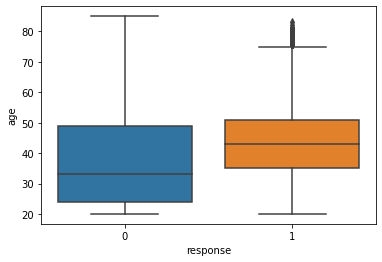

In [94]:
#age
sns.boxplot(x='response', y='age', data=df4)

<AxesSubplot:xlabel='age', ylabel='Count'>

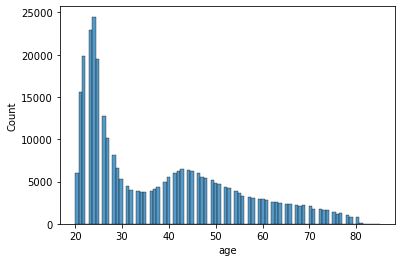

In [96]:
aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot(aux00)

<AxesSubplot:xlabel='age', ylabel='Count'>

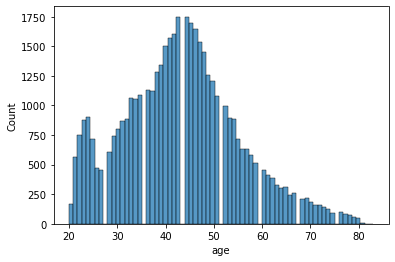

In [97]:
aux01 = df4.loc[df4['response'] == 1, 'age']
sns.histplot(aux01)

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

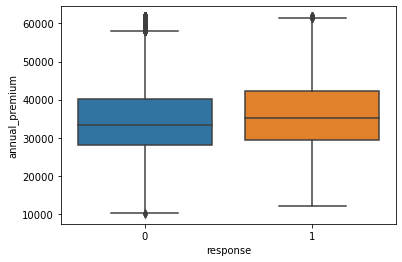

In [105]:
#annual_premium
aux1 = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]
sns.boxplot(x='response', y='annual_premium', data=aux1)

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

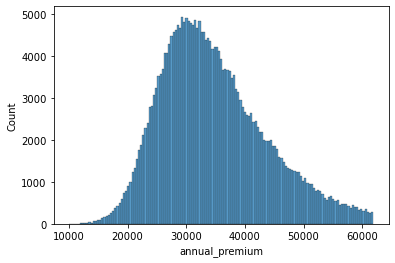

In [106]:
aux00 = aux1.loc[aux1['response'] == 0, 'annual_premium']
sns.histplot(aux00)

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

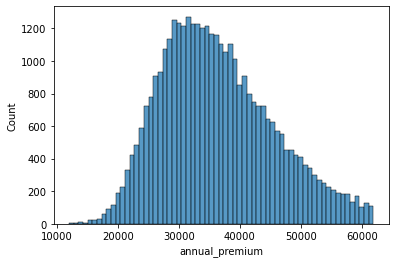

In [107]:
aux01 = aux1.loc[aux1['response'] == 1, 'annual_premium']
sns.histplot(aux01)

,response,driving_license,driving_license_perc
0,0,324911,0.878076
1,1,45115,0.121924


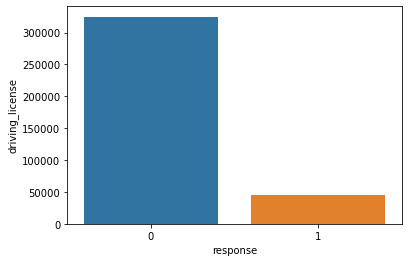

In [113]:
#driving_license
aux1 = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
sns.barplot(x='response', y='driving_license', data=aux1)
aux1['driving_license_perc'] = aux1['driving_license'] / aux1['driving_license'].sum()
aux1

<AxesSubplot:xlabel='region_code', ylabel='id'>

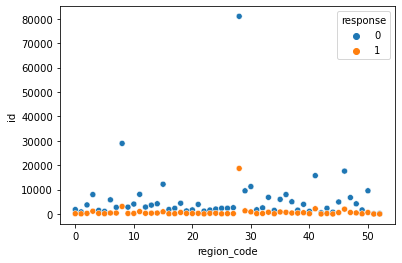

In [115]:
#region_code
aux1 = df4[['id','region_code','response']].groupby(['region_code','response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue='response', data=aux1)

In [117]:
#previously_insured
pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.775388,0.224612
1,0.999096,0.000904


In [119]:
#vehicle_age
df4[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,0
0,1.5,0,0.432772
1,1.0,0,0.416644
2,1.5,1,0.091009
3,2.0,0,0.028803
4,1.0,1,0.019040
5,2.0,1,0.011732


<AxesSubplot:xlabel='response', ylabel='policy_sales_channel'>

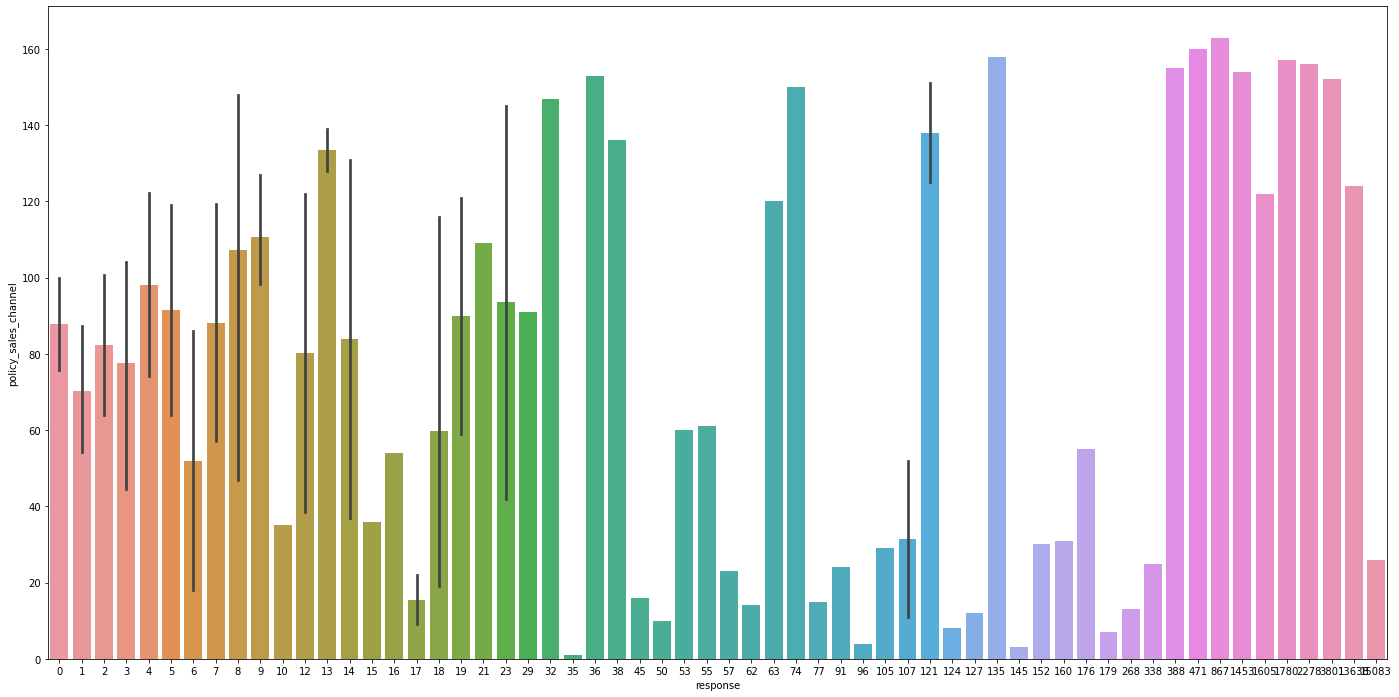

In [123]:
#policy_channel
plt.figure(figsize=(24,12))
aux1 = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x='response', y='policy_sales_channel', data=aux1)

<AxesSubplot:xlabel='response', ylabel='vintage'>

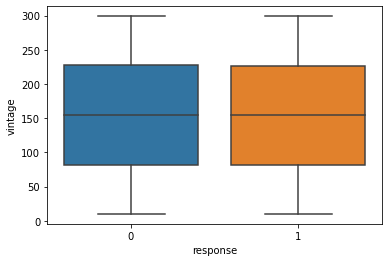

In [124]:
#vintage
sns.boxplot(x='response', y='vintage', data=df4)

<AxesSubplot:xlabel='vintage', ylabel='Count'>

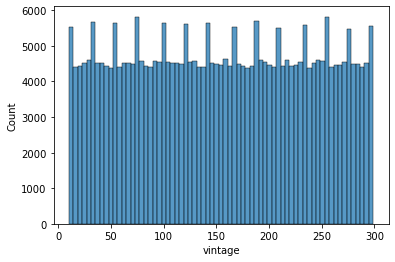

In [125]:
aux00 = df4.loc[df4['response'] == 0, 'vintage']
sns.histplot(aux00)

<AxesSubplot:xlabel='vintage', ylabel='Count'>

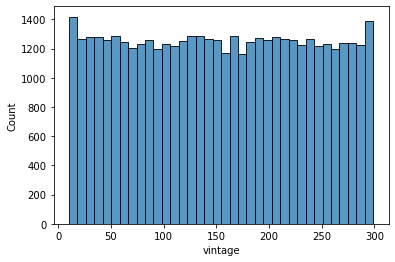

In [126]:
aux01 = df4.loc[df4['response'] == 1, 'vintage']
sns.histplot(aux01)

## 4.1 Bivariate Analysis

People between 30 years old are more susceptible to have an insurance

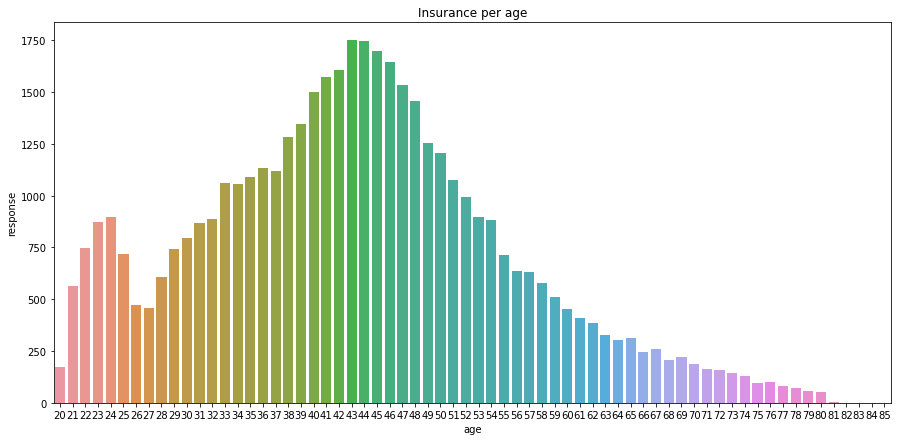

In [49]:
#insurance per age
aux1 = df4[['age', 'response']].groupby('age').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='age', y='response', ax=ax, data=aux1)
plt.title('Insurance per age')
plt.show()

In [50]:
#% insurance per age - %
aux1 = df4[(df4['age'] <= 80)]
aux1 = aux1[['age', 'response']].groupby(['age','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc(aux1)

<ipython-input-3-8a614af07ed1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


In [51]:
#divide bewtween two groups between and outside 30
aux1 = aux1[(aux1['response'] == 1)]
aux_30 = aux1.loc[(aux1['age'] >= 30) & (aux1['age'] <= 39)]
aux_30 = pd.DataFrame(aux_30.apply(np.mean)).T

aux_29 = aux1.loc[(aux1['age'] < 30) | (aux1['age'] > 39)]
aux_29 = pd.DataFrame(aux_29.apply(np.mean)).T

#result of average
m = pd.concat([aux_30, aux_29]).T.reset_index()
m.columns = ['index','between 30','outside 30']
#m.drop(['response'], axis=1)
m['index'] = {'mean age': 0, 'response': 1, 'mean quant': 2, 'average % insur': 3}
m

,index,between 30,outside 30
0,mean age,34.500000,53.039216
1,response,1.000000,1.000000
2,mean quant,1064.100000,676.627451
3,average % insur,20.174872,12.148570


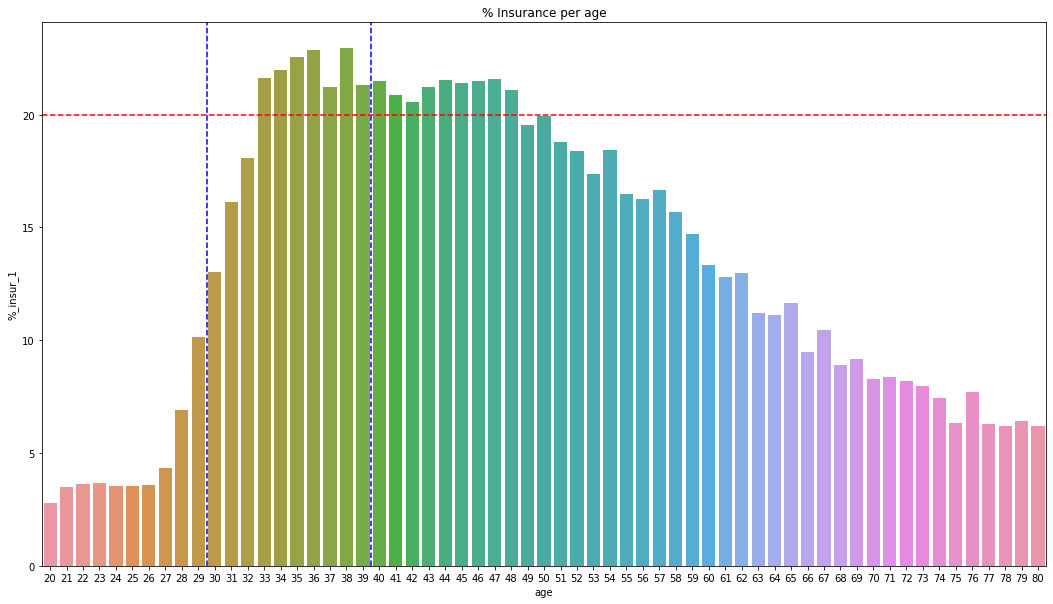

In [52]:
#histogram insurance per age %
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='age', y='%_insur_1', ax=ax, data=aux1)
graph.axvline(9.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axvline(19.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(20, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per age')
plt.show()

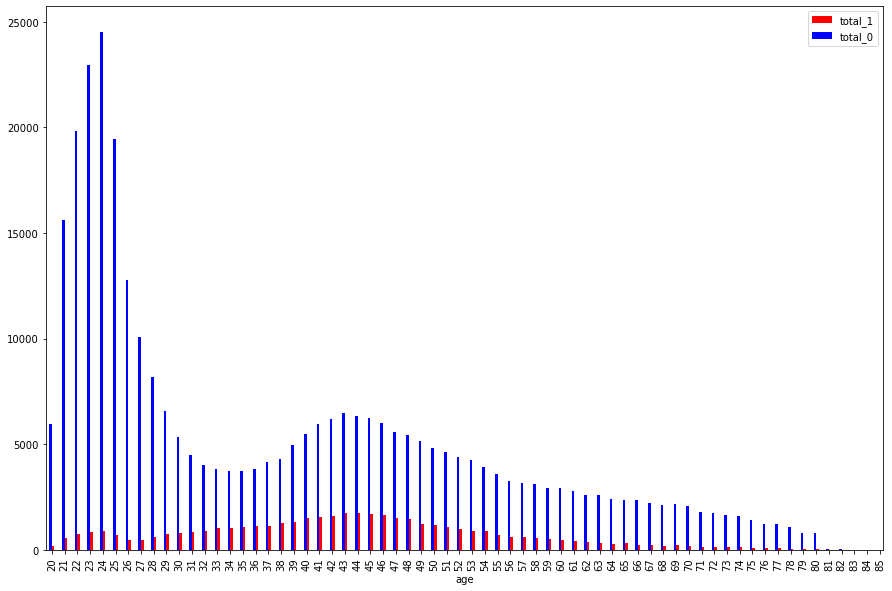

In [53]:
#cvd per height
aux1 = df4[(df4['response'] >= 1)]
aux1 = aux1[['age', 'response']].groupby('age').size().reset_index().rename(columns={0:'total_1'})

aux2 = df4[(df4['response'] <= 0)]
aux2 = aux2[['age', 'response']].groupby('age').size().reset_index().rename(columns={0:'total_0'})

#histogram
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='age', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='age', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

Women hire more insurances

In [54]:
#transform to categorical
df42 = df4.copy()
df42['gender'] = df42['gender'].apply({1:'women', 2:'men'}.get)

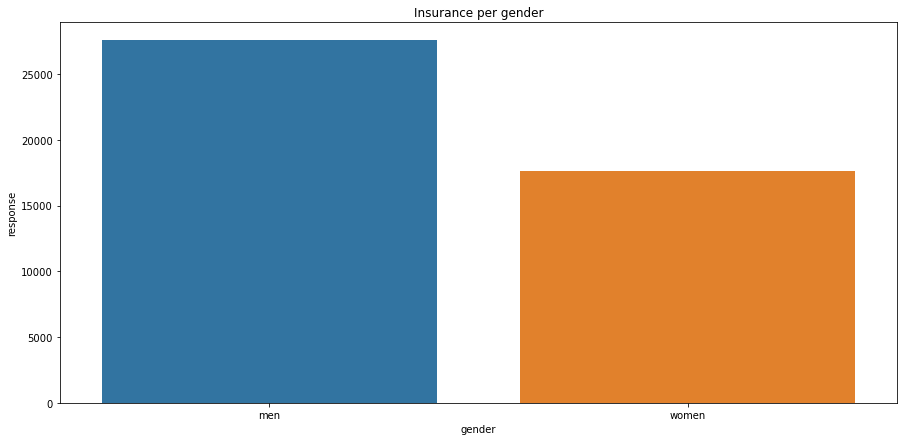

In [55]:
#insurance per gender
aux1 = df42[['gender', 'response']].groupby('gender').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='gender', y='response', ax=ax, data=aux1)
plt.title('Insurance per gender')
plt.show()

In [56]:
#calculate % insurance per gender
aux1 = df42[['gender', 'response']].groupby(['gender','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc(aux1)

#result of %
aux1 = aux1[(aux1['response'] >= 1)]
aux1

<ipython-input-3-8a614af07ed1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


,gender,response,total,%_insur_1
1,men,1,27556,13.756059
3,women,1,17599,10.323811


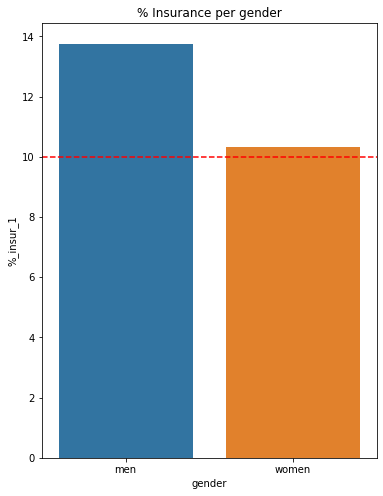

In [57]:
#histogram insurance per gender (average)
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='gender', y='%_insur_1', ax=ax, data=aux1)
graph.axhline(10, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per gender')
plt.show()

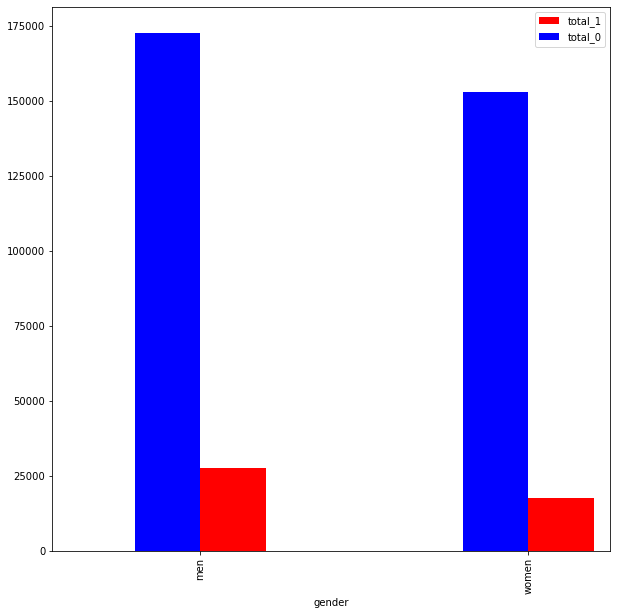

In [58]:
#insurance per gender
aux1 = df42[(df42['response'] >= 1)]
aux1 = aux1[['gender', 'response']].groupby('gender').size().reset_index().rename(columns={0:'total_1'})

aux2 = df42[(df42['response'] <= 0)]
aux2 = aux2[['gender', 'response']].groupby('gender').size().reset_index().rename(columns={0:'total_0'})

#histogram
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='gender', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='gender', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

Owners with new cars (< 1 yr) hire more insurances

In [59]:
#transform to categorical
df42 = df4.copy()
df42['vehicle_age'] = df42['vehicle_age'].apply({1:'less 1yr', 1.5:'between 1 - 2 yr', 2:'more 2 yr'}.get)

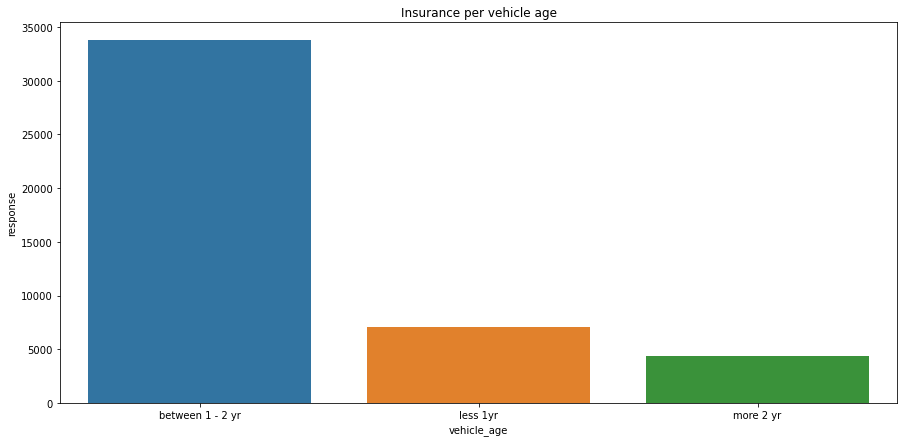

In [60]:
#insurance per vehicle_age
aux1 = df42[['vehicle_age', 'response']].groupby('vehicle_age').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='vehicle_age', y='response', ax=ax, data=aux1)
plt.title('Insurance per vehicle age')
plt.show()

In [61]:
#calculate % insurance per vehicle_age
aux1 = df42[['vehicle_age', 'response']].groupby(['vehicle_age','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc(aux1)

#result of %
aux1 = aux1[(aux1['response'] >= 1)]
aux1

<ipython-input-3-8a614af07ed1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


,vehicle_age,response,total,%_insur_1
1,between 1 - 2 yr,1,33745,17.375342
3,less 1yr,1,7060,4.370245
5,more 2 yr,1,4350,28.942116


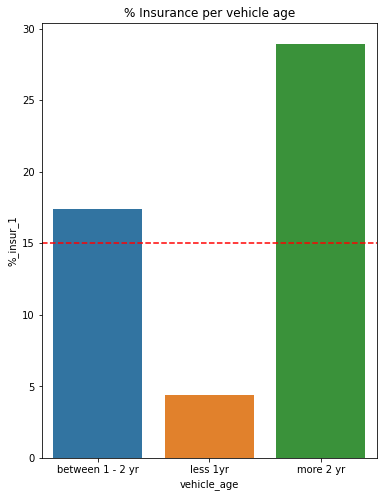

In [62]:
#histogram insurance per vehicle_age (average)
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='vehicle_age', y='%_insur_1', ax=ax, data=aux1)
graph.axhline(15, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per vehicle age')
plt.show()

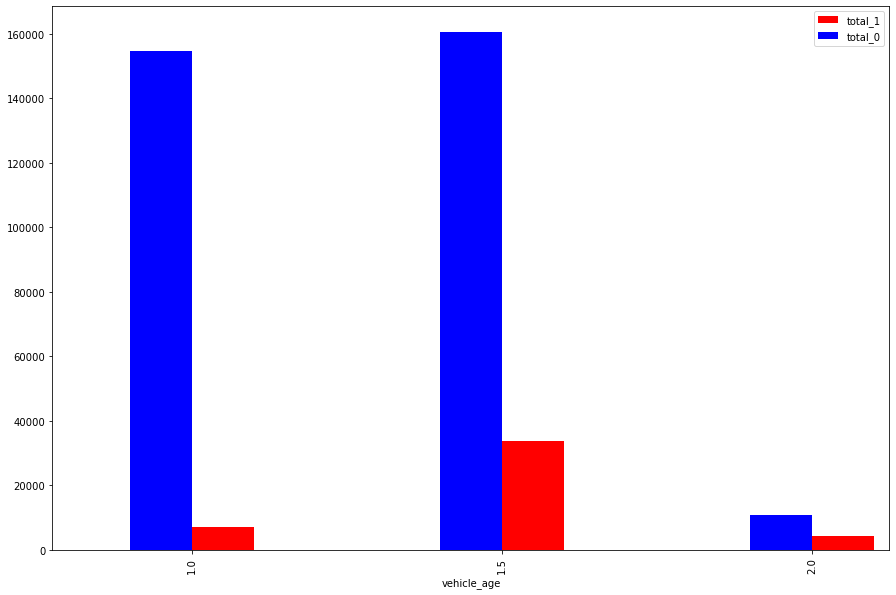

In [63]:
#cvd per height
aux1 = df4[(df4['response'] >= 1)]
aux1 = aux1[['vehicle_age', 'response']].groupby('vehicle_age').size().reset_index().rename(columns={0:'total_1'})

aux2 = df4[(df4['response'] <= 0)]
aux2 = aux2[['vehicle_age', 'response']].groupby('vehicle_age').size().reset_index().rename(columns={0:'total_0'})

#histogram
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='vehicle_age', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='vehicle_age', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

People with drive license hire more insurances

In [64]:
#transform to categorical
df42 = df4.copy()
df42['driving_license'] = df42['driving_license'].apply({0:'no', 1:'yes'}.get)

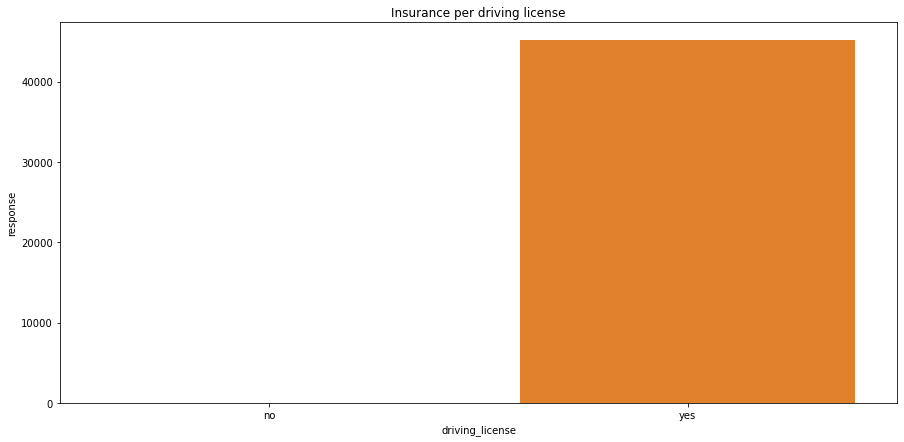

In [65]:
#insurance per driving_license
aux1 = df42[['driving_license', 'response']].groupby('driving_license').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='driving_license', y='response', ax=ax, data=aux1)
plt.title('Insurance per driving license')
plt.show()

In [66]:
#calculate % insurance per driving_license
aux1 = df42[['driving_license', 'response']].groupby(['driving_license','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc(aux1)

#result of %
aux1 = aux1[(aux1['response'] >= 1)]
aux1

<ipython-input-3-8a614af07ed1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


,driving_license,response,total,%_insur_1
1,no,1,40,5.242464
3,yes,1,45115,12.192386


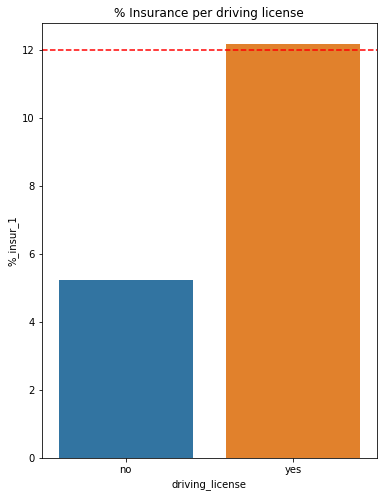

In [67]:
#histogram insurance per driving_license (average)
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='driving_license', y='%_insur_1', ax=ax, data=aux1)
graph.axhline(12, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per driving license')
plt.show()

Owners with vehicle damaged dont hire insurances

In [68]:
#transform to categorical
df42 = df4.copy()
df42['vehicle_damage'] = df42['vehicle_damage'].apply({0:'no', 1:'yes'}.get)

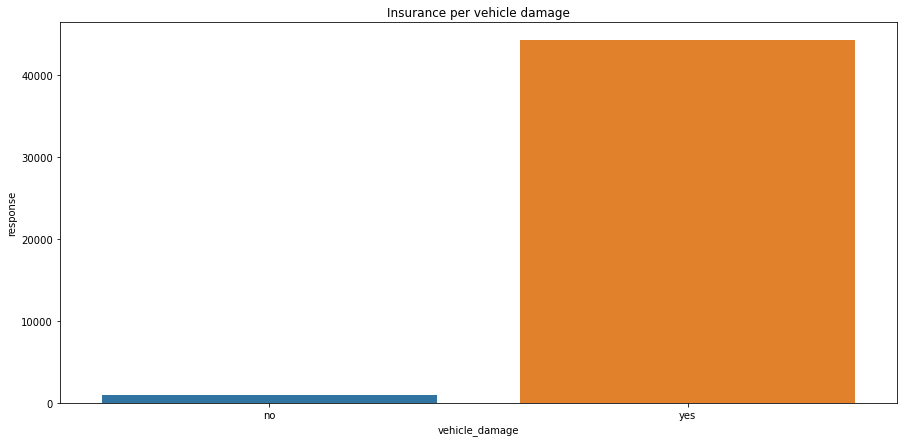

In [69]:
#insurance per vehicle_damage
aux1 = df42[['vehicle_damage', 'response']].groupby('vehicle_damage').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='vehicle_damage', y='response', ax=ax, data=aux1)
plt.title('Insurance per vehicle damage')
plt.show()

In [70]:
#calculate % insurance per vehicle_damage
aux1 = df42[['vehicle_damage', 'response']].groupby(['vehicle_damage','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc(aux1)

#result of %
aux1 = aux1[(aux1['response'] >= 1)]
aux1

<ipython-input-3-8a614af07ed1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


,vehicle_damage,response,total,%_insur_1
1,no,1,967,0.524893
3,yes,1,44188,23.685551


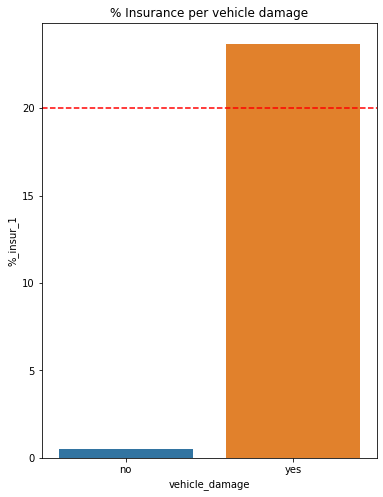

In [71]:
#histogram insurance per vehicle_damage (average)
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='vehicle_damage', y='%_insur_1', ax=ax, data=aux1)
graph.axhline(20, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per vehicle damage')
plt.show()

People previously insured hire another insurance

In [72]:
#transform to categorical
df42 = df4.copy()
df42['previously_insured'] = df42['previously_insured'].apply({0:'no', 1:'yes'}.get)

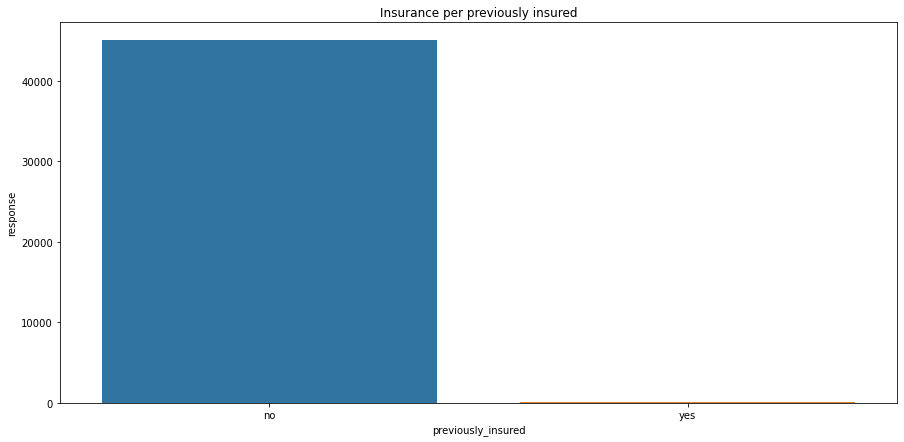

In [73]:
#insurance per previously_insured
aux1 = df42[['previously_insured', 'response']].groupby('previously_insured').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='previously_insured', y='response', ax=ax, data=aux1)
plt.title('Insurance per previously insured')
plt.show()

In [74]:
#calculate % insurance per driving_license
aux1 = df42[['previously_insured', 'response']].groupby(['previously_insured','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc(aux1)

#result of %
aux1 = aux1[(aux1['response'] >= 1)]
aux1

<ipython-input-3-8a614af07ed1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


,previously_insured,response,total,%_insur_1
1,no,1,45001,22.461193
3,yes,1,154,0.090355


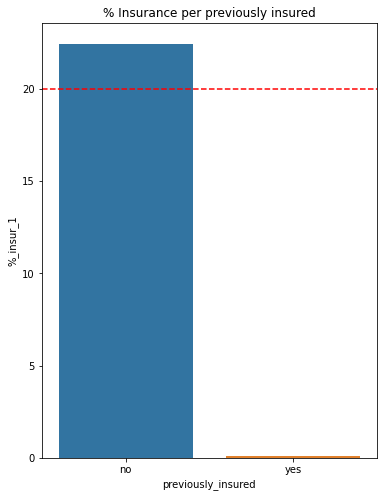

In [75]:
#histogram insurance per previously_insured (average)
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='previously_insured', y='%_insur_1', ax=ax, data=aux1)
graph.axhline(20, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per previously insured')
plt.show()

Higher than 50K annual premium there are more insurances

In [76]:
df4 = df3.copy()

In [77]:
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '10' if x <= 10000 else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '15' if (x > 10000 and x <= 20000) else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '20' if (x > 20000 and x <= 30000) else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '30' if (x > 30000 and x <= 40000) else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '40' if (x > 40000 and x <= 50000) else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '50' if (x > 50000 and x <= 60000) else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '60' if x > 60000 else x)

In [78]:
df42['annual_premium_2'] = df4.apply(lambda x: '10' if x['annual_premium'] <= 10000 else ''
                                                      '15' if (x['annual_premium'] > 10000 and x['annual_premium'] <= 20000) else '' 
                                                      '20' if (x['annual_premium'] > 20000 and x['annual_premium'] <= 30000) else '' 
                                                      '30' if (x['annual_premium'] > 30000 and x['annual_premium'] <= 40000) else '' 
                                                      '40' if (x['annual_premium'] > 40000 and x['annual_premium'] <= 50000) else ''    
                                                      '50' if (x['annual_premium'] > 50000 and x['annual_premium'] <= 60000) else ''   
                                                      '60' if x['annual_premium'] > 60000 else '', axis = 1)


In [79]:
df43 = df42.copy()
df43['annual_premium_2'] = pd.to_numeric(df42['annual_premium_2'],errors = 'coerce')

In [80]:
#transform to categorical
#df43 = df42.copy()
df42['annual_premium_2'] = df43['annual_premium_2'].apply({10:'< 10K', 15:'10 - 20K', 20: '20 - 30K', 30: '30 - 40K', 40: '40 - 50K', 50: '50 - 60K', 60: '> 60K'}.get)

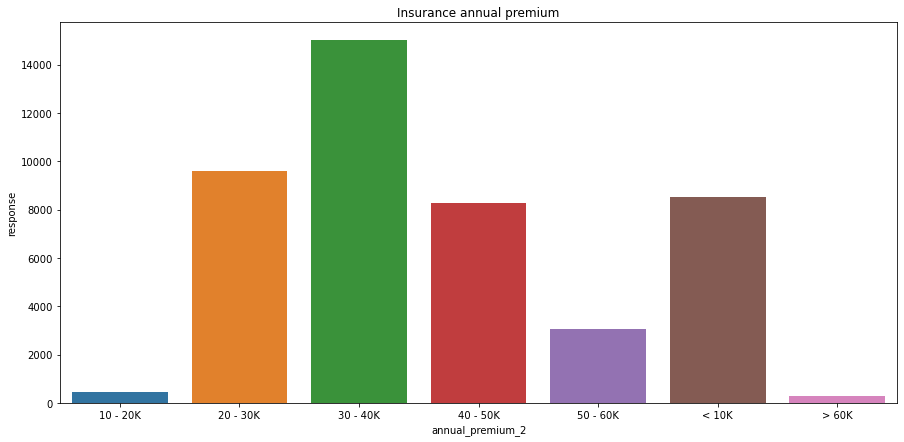

In [81]:
#insurance per annual_premium
aux1 = df42[['annual_premium_2', 'response']].groupby('annual_premium_2').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='annual_premium_2', y='response', ax=ax, data=aux1)
plt.title('Insurance annual premium')
plt.show()

In [82]:
#% insurance per age - %
aux1 = df43[['annual_premium_2', 'response']].groupby(['annual_premium_2','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc(aux1)

<ipython-input-3-8a614af07ed1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


In [83]:
#divide bewtween two groups between and outside 30
aux1 = aux1[(aux1['response'] == 1)]
aux_50 = aux1[(aux1['annual_premium_2'] >= 50)]
aux_50 = pd.DataFrame(aux_50.apply(np.mean)).T

aux_49 = aux1.loc[(aux1['annual_premium_2'] < 50)]
aux_49 = pd.DataFrame(aux_49.apply(np.mean)).T

#result of average
m = pd.concat([aux_50, aux_49]).T.reset_index()
m.columns = ['index','above 50','less 50']
#m.drop(['response'], axis=1)
m['index'] = {'mean': 0, 'response': 1, 'mean quant': 2, 'average % insur': 3}
m

,index,above 50,less 50
0,mean,55.000000,23.000000
1,response,1.000000,1.000000
2,mean quant,1672.000000,8362.200000
3,average % insur,15.354414,11.465135


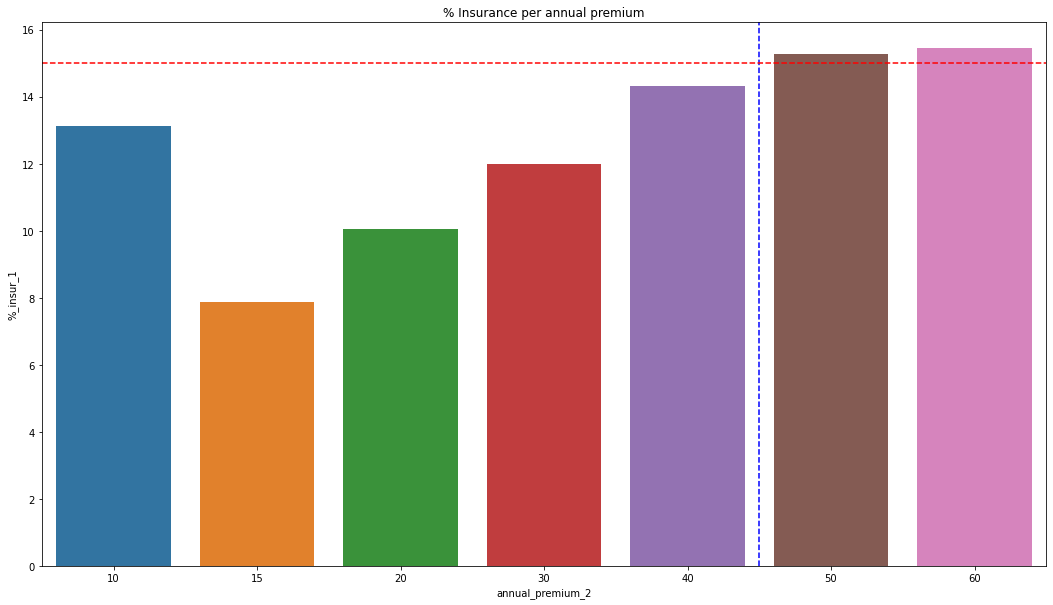

In [84]:
#histogram insurance per age %
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='annual_premium_2', y='%_insur_1', ax=ax, data=aux1)
graph.axvline(4.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(15, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per annual premium')
plt.show()

# 5.0. Data Preparation

In [201]:
df5 = df4.copy()

In [202]:
x = df4.drop('response', axis=1)
y = df4['response'].copy()

x_train, x_val, y_train, y_val = ms.train_test_split(x,y, test_size = 0.20)
df5 = pd.concat([x_train, y_train], axis=1)

## 5.1. Standardization

In [203]:
ss = pp.StandardScaler()

#annual_premium
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)

## 5.2. Rescaling

In [204]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

#age
df5['age'] = mms_age.fit_transform(df5[['age']].values)

#vintage
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)

## 5.3. Enconder

In [205]:
#gender
target_encode_gender = df5.groupby('gender')['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map(target_encode_gender)

#region_code
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encode_region_code)

#vehicle_age
df5 = pd.get_dummies(df5, prefix='vehicle_age', columns = ['vehicle_age'])

#policy_sales_channel
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size()/len(df5)
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)

## 5.4. Validation Preparation

In [206]:
#gender
x_val.loc[:, 'gender'] = x_val.loc[:, 'gender'].map(target_encode_gender)

#age
x_val.loc[:, 'age'] = mms_age.transform(x_val[['age']].values)

#region_code
x_val.loc[:, 'region_code'] = x_val['region_code'].map(target_encode_region_code)

#vehicle_age
x_val = pd.get_dummies(x_val, prefix='vehicle_age', columns = ['vehicle_age'])

#annual_premium
x_val.loc[:, 'annual_premium'] = ss.transform(x_val[['annual_premium']].values)

#policy_sales_channel
x_val.loc[:, 'policy_sales_channel'] = x_val['policy_sales_channel'].map(fe_policy_sales_channel)

#vintage
x_val.loc[:, 'vintage'] = mms_vintage.transform(x_val[['vintage']].values)

#fillna
x_val = x_val.fillna(0)

C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

# 6.0. Feature Selection

In [207]:
df6 = df5.copy()

## 6.1. Feature Importancia

In [208]:
#model definition
forest = en.ExtraTreesClassifier (n_estimators =250, random_state = 0, n_jobs=-1)

#data preparation
x_train_n = df6.drop(['id', 'response'], axis=1)
y_train_n = y_train.values
forest.fit(x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
                       feature  importance
0                      vintage    0.272686
0               annual_premium    0.244549
0                          age    0.165388
0                  region_code    0.104714
0               vehicle_damage    0.074002
0         policy_sales_channel    0.061457
0           previously_insured    0.050204
0       vehicle_age_under 1 yr    0.013633
0  vehicle_age_between 1 - 2yr    0.005733
0                       gender    0.004865
0        vehicle_age_over 2 yr    0.002316
0              driving_license    0.000455


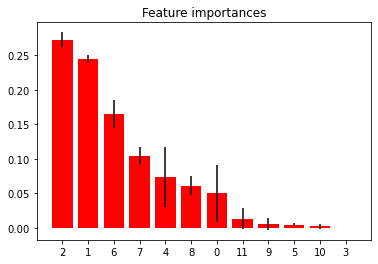

In [209]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#print the feature ranking
print('Feature ranking:')
df = pd.DataFrame()
for i, j in zip(x_train_n, forest.feature_importances_):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df = pd.concat([df, aux], axis=0)

print(df.sort_values('importance', ascending=False))

#plot the impurity-based feature importances of the forest
plt.figure()
plt.title('Feature importances')
plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 7.0. Machine Learning

In [210]:
df7 = df6.copy()

In [215]:
cols_selected = ['previously_insured', 'annual_premium', 'vintage', 'vehicle_damage', 'age',
                 'region_code','policy_sales_channel',]

x_train = df7[cols_selected]
x_val = x_val[cols_selected]

## 7.1. KNN

In [222]:
#model definition
knn_model = nh.KNeighborsClassifier(n_neighbors=7)

#model training
knn_model.fit(x_train, y_train)

#model prediciotn
yhat_knn = knn_model.predict_proba(x_val)

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

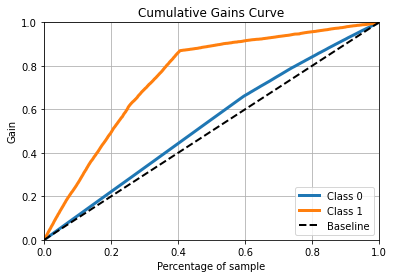

In [223]:
#accumulative gain
skplt.metrics.plot_cumulative_gain(y_val,yhat_knn)

## 7.2. LR

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

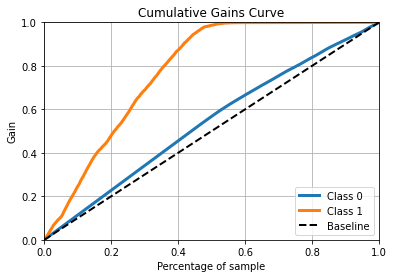

In [221]:
#model definition
lr_model = lm.LogisticRegression(random_state=42)

#model training
lr_model.fit(x_train, y_train)

#model prediction
yhat_lr = lr_model.predict_proba(x_val)

#Accumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr)

# 

# 